## Proyecto de Clustering

### Importar librerias 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/joseph/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Cargar datos 

In [2]:
df_country = pd.read_csv('Country-data.csv')

In [3]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Manejando valores nulos

In [5]:
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### Validando dulpicados

In [6]:
df_country[df_country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


### Análisis de distribución

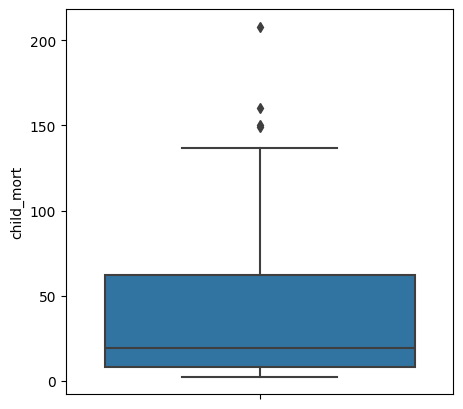

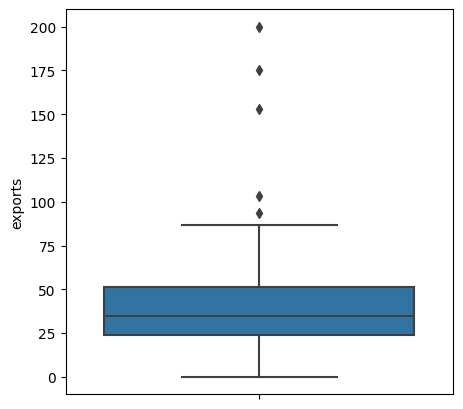

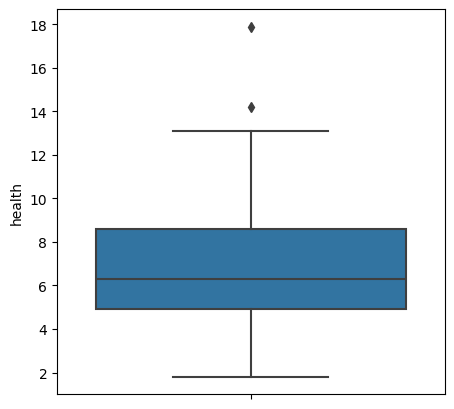

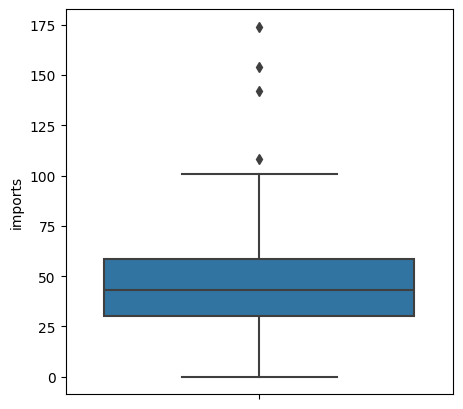

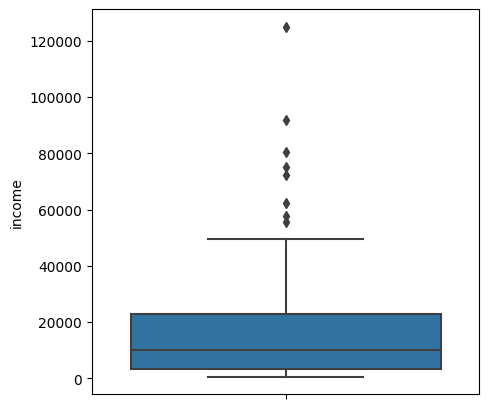

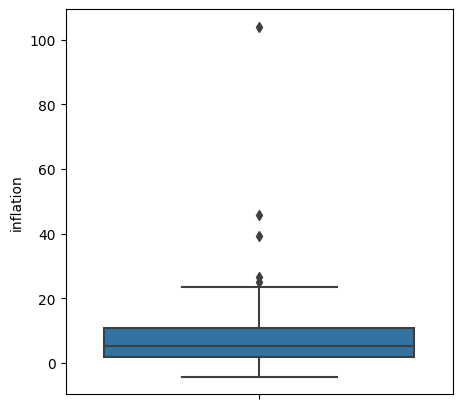

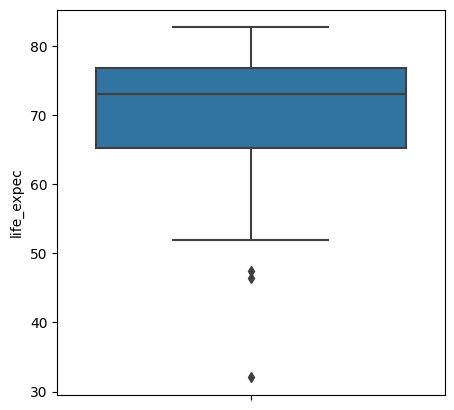

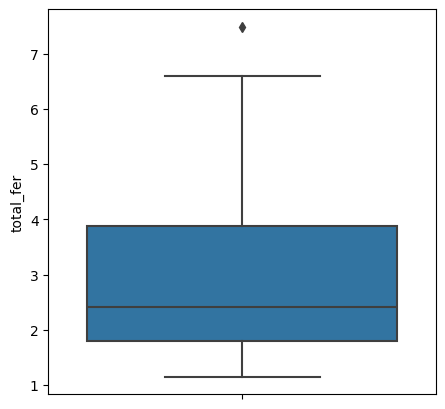

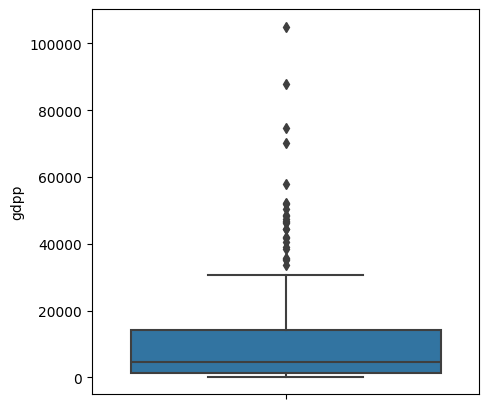

In [7]:
int_cols = df_country.select_dtypes(exclude='object').columns
for _ in int_cols:
    plt.figure(figsize=(5,5))
    sns.boxplot(data=df_country, y=_)
    plt.show()

In [8]:
df_country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [9]:
df_corr = df_country.drop('country',axis=1)

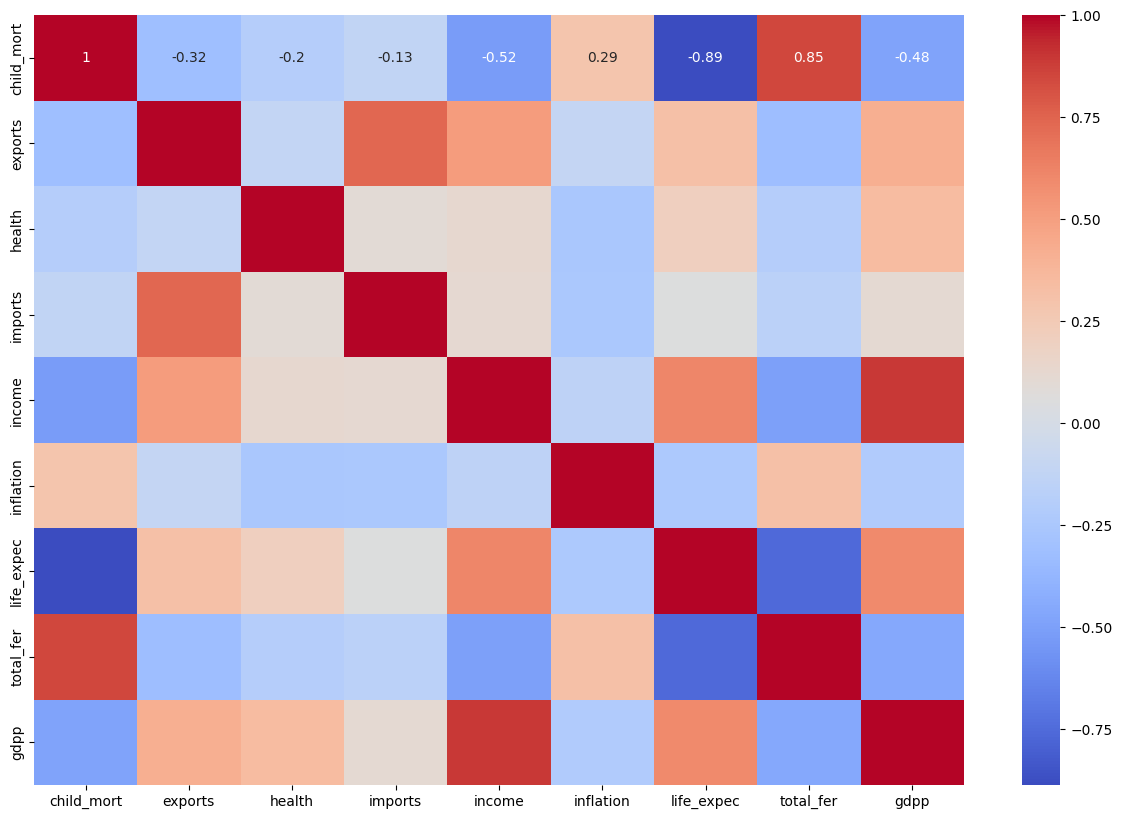

In [10]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_corr.corr(),annot=True,cmap='coolwarm')
plt.show()

### Escalar los Datos

In [11]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
df_country_scaler = scaler.fit_transform(df_country.drop('country',axis=1))

In [12]:
df_country_scaler = pd.DataFrame(df_country_scaler, columns=df_country.drop('country',axis=1).columns)
df_country_scaler .head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


### PCA

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA()
pca.fit(df_country_scaler)
pca_data_scaled = pca.transform(df_country_scaler)
pca_data_scaled

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

In [15]:
var = pca.explained_variance_ratio_
print(var)

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


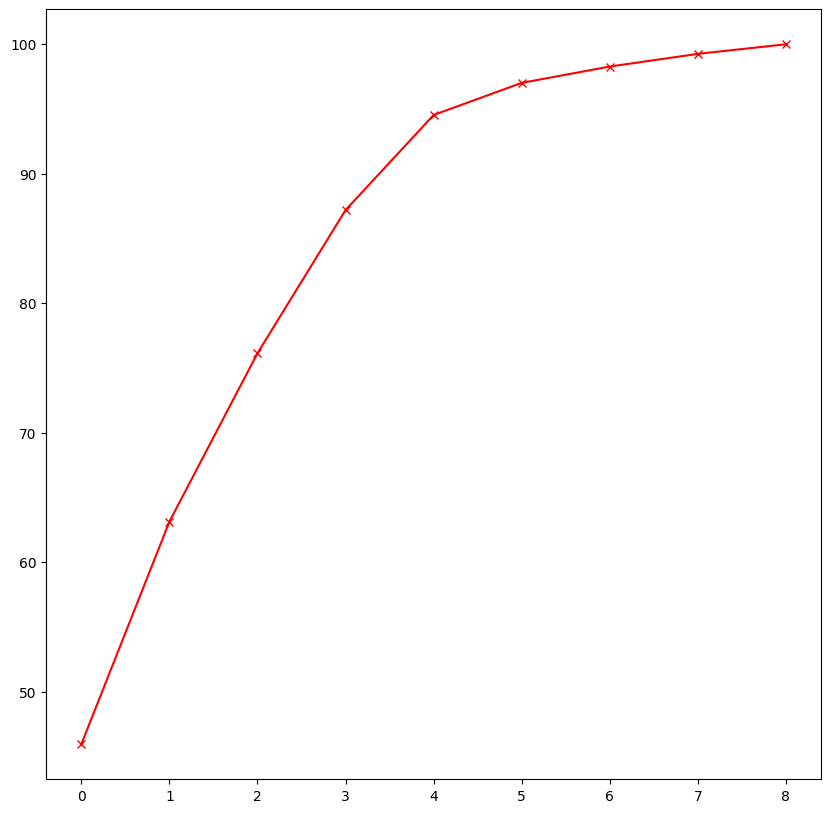

In [16]:
cum_var = np.cumsum(np.round(var,decimals=4)*100)
plt.figure(figsize=(10,10))
plt.plot(cum_var,'r-x')
plt.show()

In [17]:
pca_data_standard = pd.DataFrame(pca_data_scaled)
pca_data_standard.drop([4,5,6,7,8],axis=1,inplace=True)

In [18]:
pca_data_standard

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


### Importar librerías para clustering

In [19]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

### K-means

In [20]:
Sum_of_squared_distances=[]
silhouette_score_scores=[]
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    y = km.fit_predict(pca_data_standard)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_score_scores.append(silhouette_score(pca_data_standard,y))



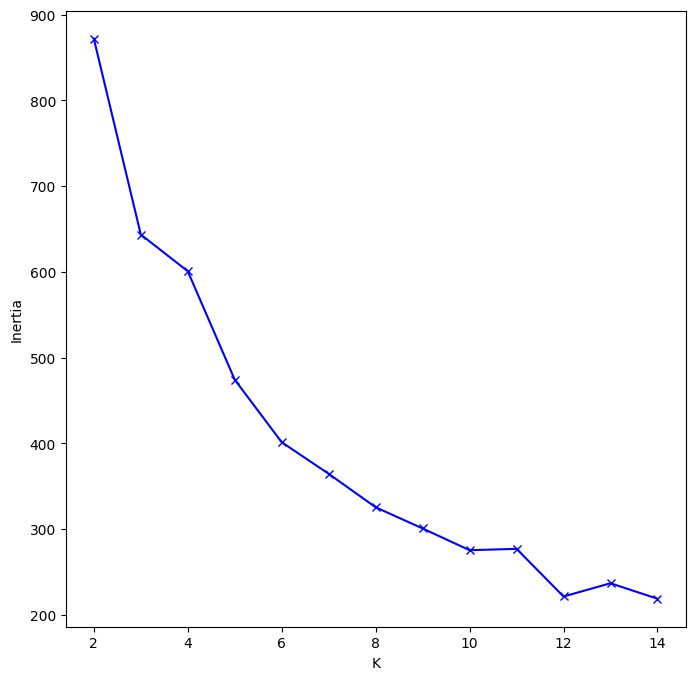

In [21]:
fig = plt.figure(figsize=(8,8))
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

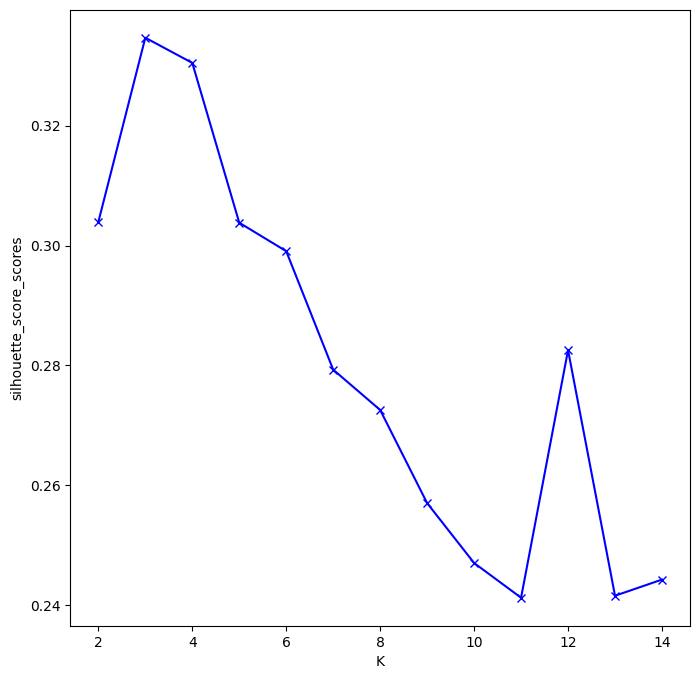

In [22]:
fig = plt.figure(figsize=(8,8))
plt.plot(K,silhouette_score_scores,'bx-')
plt.xlabel('K')
plt.ylabel('silhouette_score_scores')
plt.show()

In [23]:
km = KMeans(n_clusters=4)
y = km.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard,y))
df_country['Kmeans_pca'] = y

0.35491314499063326


### Sin PCA 

In [24]:
Sum_of_squared_distances=[]
silhouette_score_scores=[]
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    y = km.fit_predict(df_country_scaler)
    Sum_of_squared_distances.append(km.inertia_)
    silhouette_score_scores.append(silhouette_score(df_country_scaler ,y))



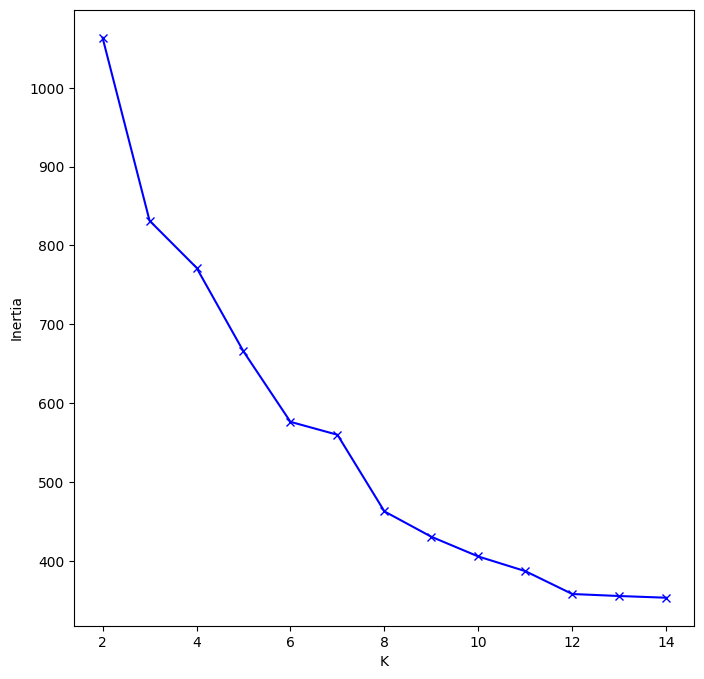

In [25]:
fig = plt.figure(figsize=(8,8))
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

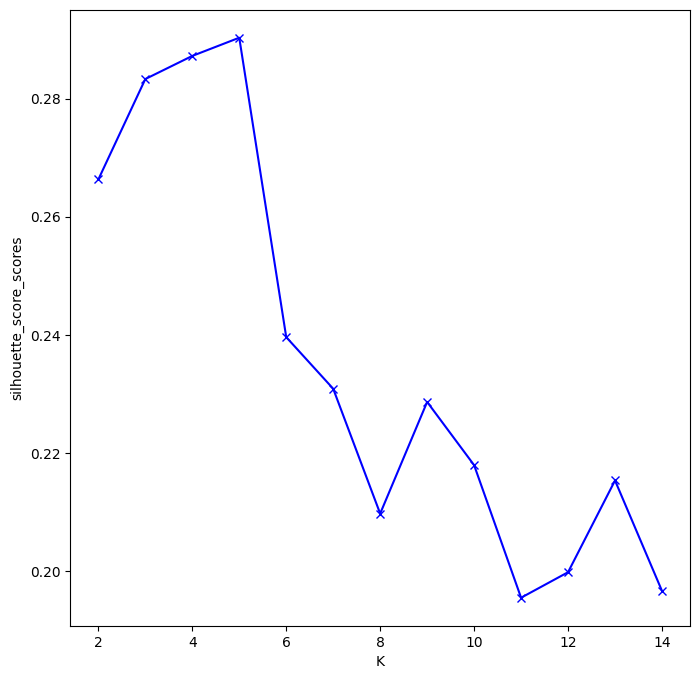

In [26]:
fig = plt.figure(figsize=(8,8))
plt.plot(K,silhouette_score_scores,'bx-')
plt.xlabel('K')
plt.ylabel('silhouette_score_scores')
plt.show()

In [27]:
km = KMeans(n_clusters=4)
y = km.fit_predict(df_country_scaler)
print(silhouette_score(df_country_scaler,y))
df_country['Kmeans_pca'] = y

0.20583700093679275


### Agglomerativen hierarchical Clustering

### PCA

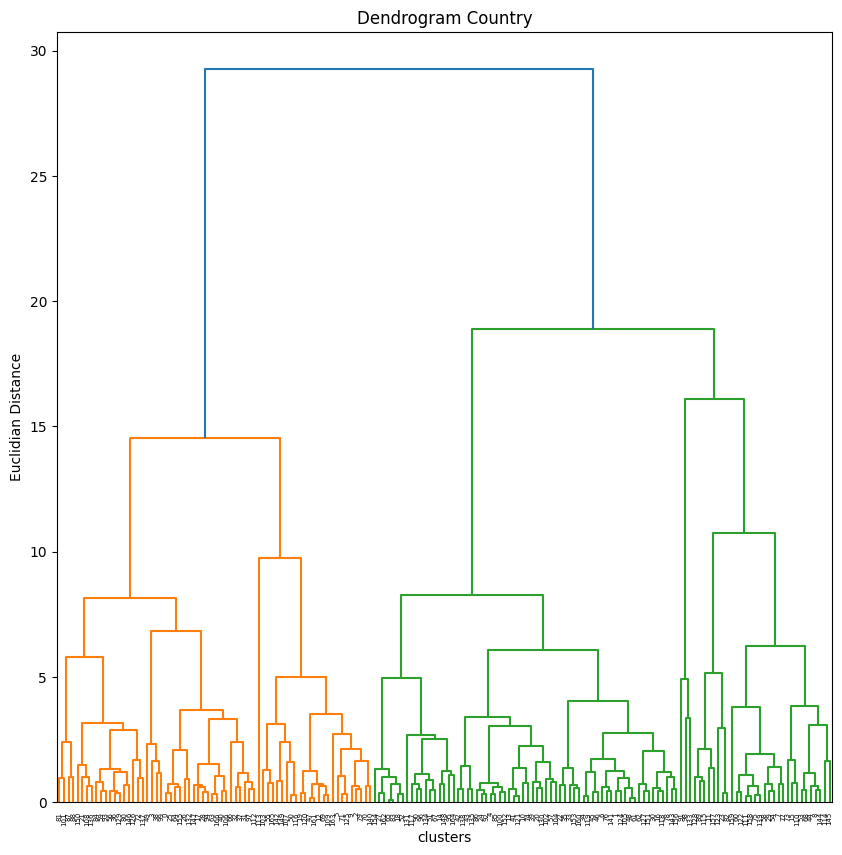

In [28]:
fig = plt.figure(figsize=(10,10))
dendrongram_plot =  dendrogram(linkage(pca_data_standard, method='ward'))
plt.title('Dendrogram Country')
plt.xlabel('clusters')
plt.ylabel('Euclidian Distance')
plt.show()

In [29]:
 hc = AgglomerativeClustering(n_clusters=2,linkage='ward')
y_hc = hc.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard,y_hc))
df_country['hc_pca'] = y_hc

0.3070110704080526


### Sin PCA

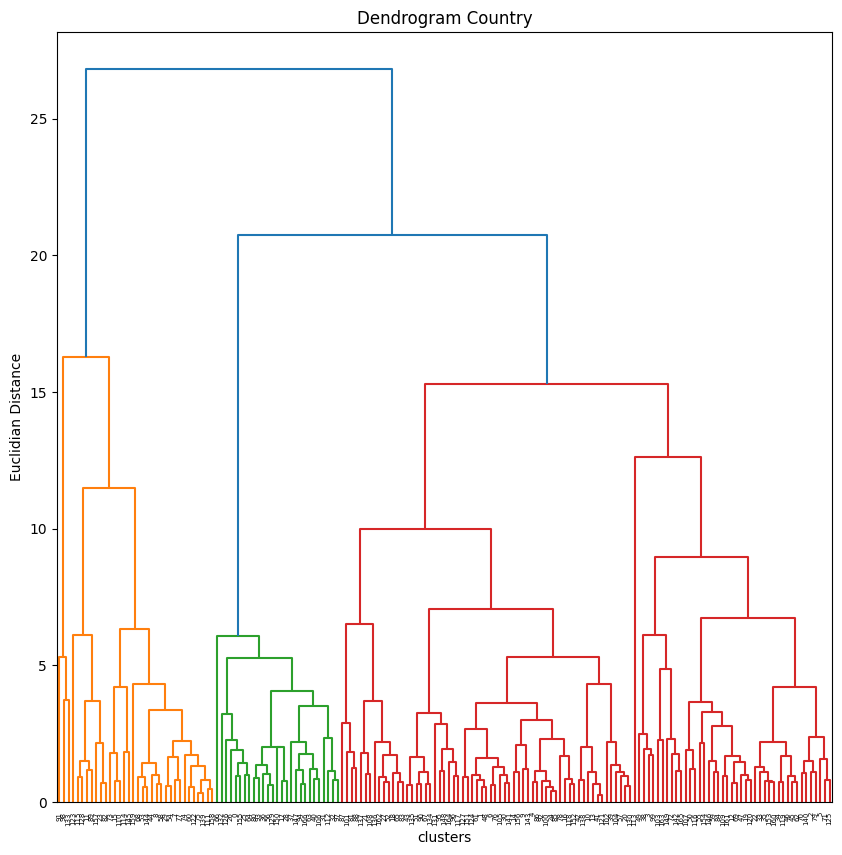

In [30]:
fig = plt.figure(figsize=(10,10))
dendrongram_plot =  dendrogram(linkage(df_country_scaler, method='ward'))
plt.title('Dendrogram Country')
plt.xlabel('clusters')
plt.ylabel('Euclidian Distance')
plt.show()

In [31]:
 hc = AgglomerativeClustering(n_clusters=2,linkage='ward')
y_hc = hc.fit_predict(df_country_scaler,)
print(silhouette_score(df_country_scaler,y_hc))
df_country['hc_pca'] = y_hc

0.3153134331018189


### DBSCAN

#### PCA

In [32]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(pca_data_standard)
distances, indices = neighbors_fit.kneighbors(pca_data_standard)

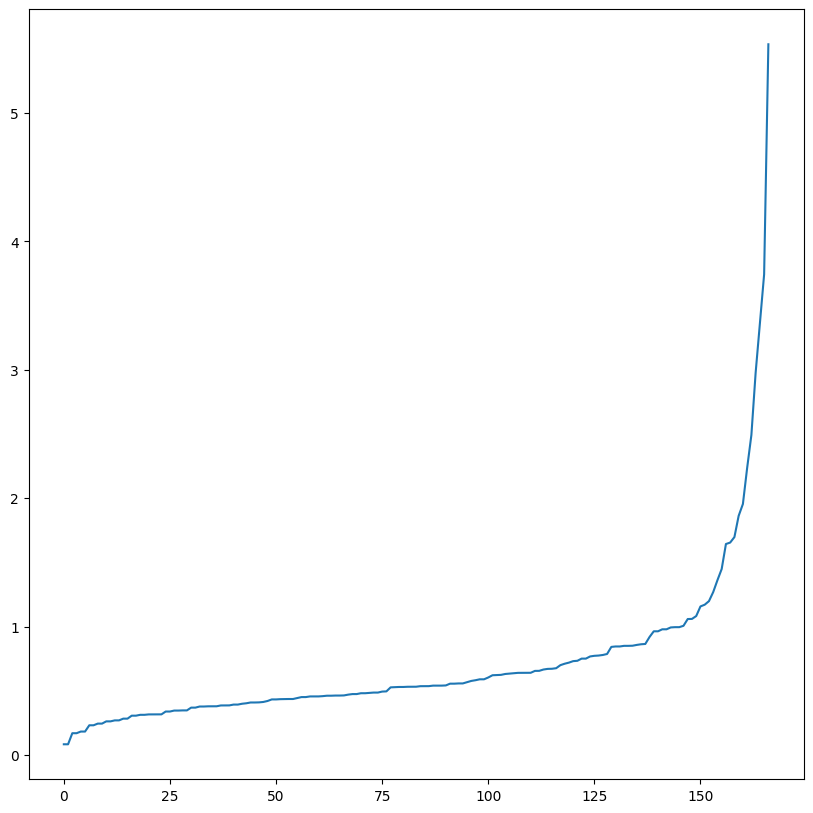

In [33]:
distances  = np.sort(distances,axis=0)
distances = distances[:,1]
fig = plt.figure(figsize=(10,10))
plt.plot(distances)

In [34]:
eps_values = np.arange(0.5,2.0,0.10)
min_samples = np.arange(3,12)


In [35]:
from itertools import product
dbscan_params =  list(product(eps_values, min_samples))
no_of_clusters = []
sil_score = []
for p in dbscan_params:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(pca_data_standard)
    try:
        sil_score.append(silhouette_score((pca_data_standard),y_dbscan))
    except:
        sil_score.append(0)
    no_of_clusters.append(len(np.unique(y_dbscan)))

        

In [36]:
df_param_tunning = pd.DataFrame.from_records(dbscan_params , columns=['eps','Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [37]:
pivot_1  =pd.pivot_table(df_param_tunning, values='sil_score', columns='eps', index='Min_samples')
pivot_2  =pd.pivot_table(df_param_tunning, values='n_clusters', columns='eps', index='Min_samples')


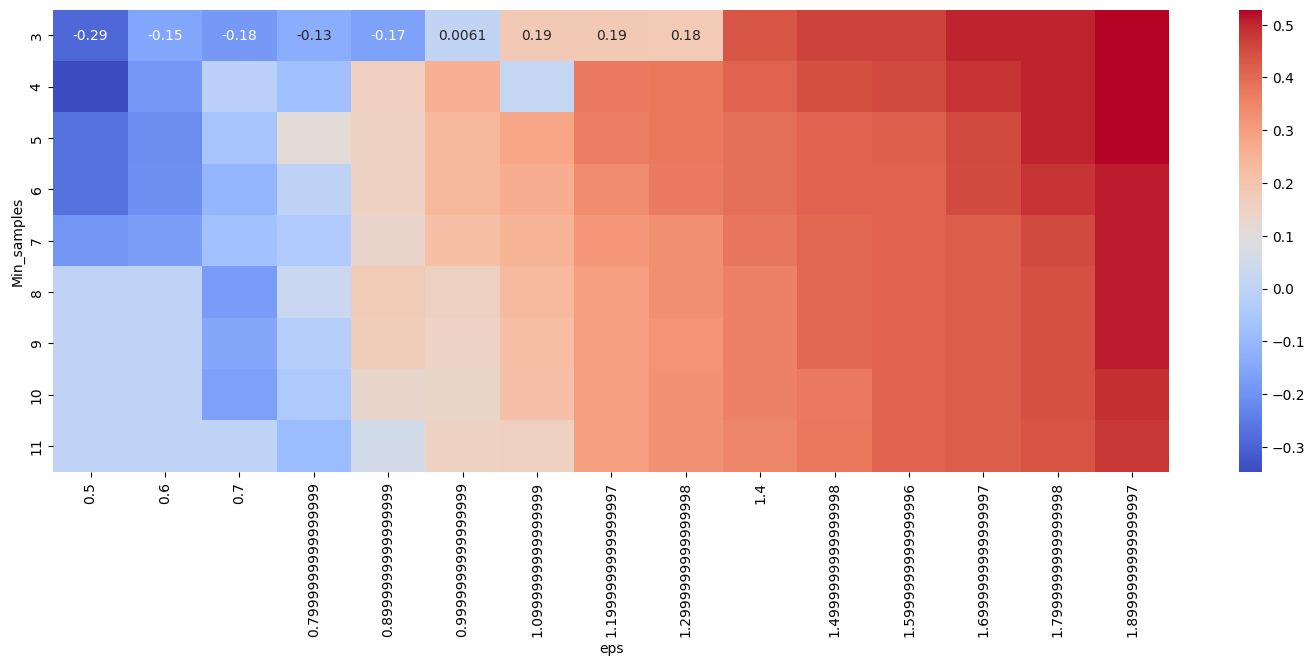

In [38]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True,annot_kws={'size':10},cmap='coolwarm',ax=ax)
plt.show()

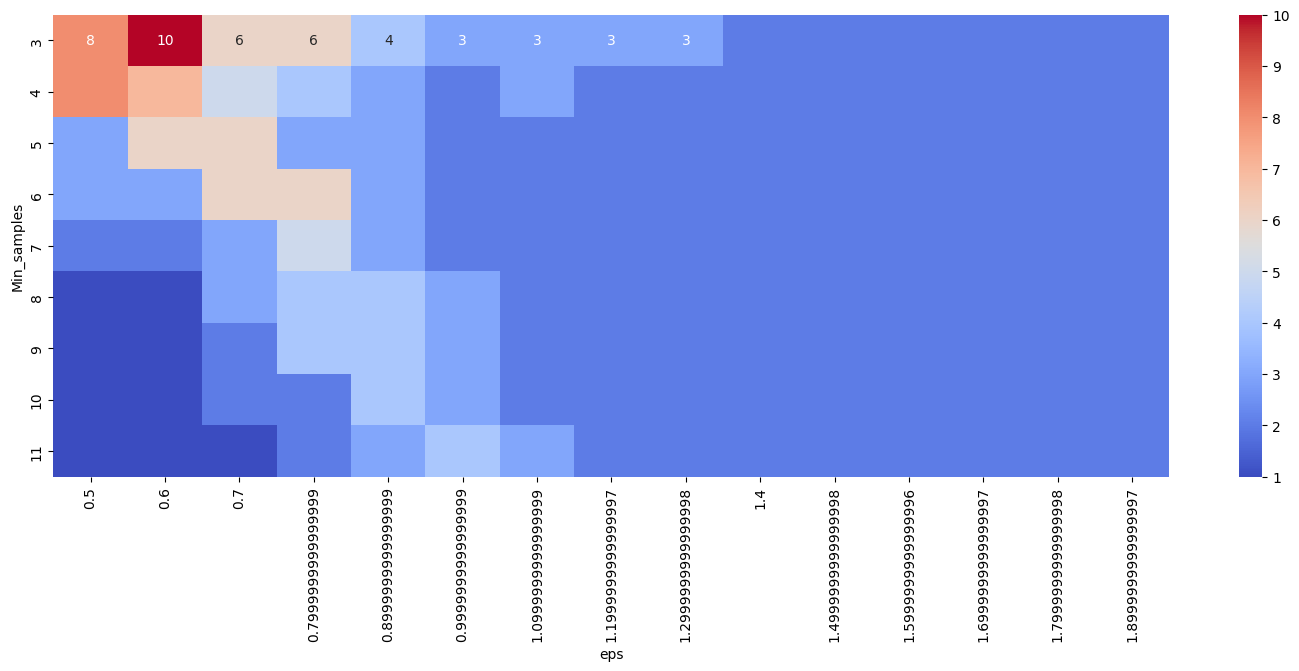

In [39]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True,annot_kws={'size':10},cmap='coolwarm',ax=ax)
plt.show()

In [43]:
dbscan_train = DBSCAN(eps=1.2, min_samples=3)
y_dbscan = dbscan_train.fit_predict(pca_data_standard)
print(silhouette_score(pca_data_standard,y_dbscan))
df_country['dbscan_pca'] = y_dbscan

0.18591175730784343


### Sin PCA

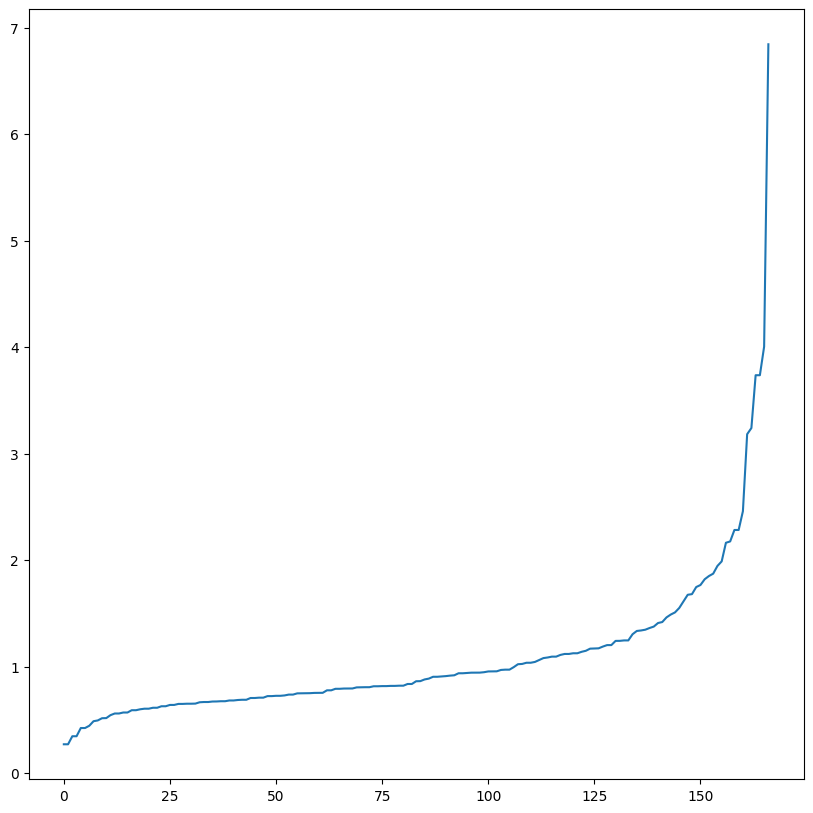

In [44]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(df_country_scaler)
distances, indices = neighbors_fit.kneighbors(df_country_scaler)

distances  = np.sort(distances,axis=0)
distances = distances[:,1]
fig = plt.figure(figsize=(10,10))
plt.plot(distances)

In [45]:
eps_values = np.arange(1,3.0,0.10)
min_samples = np.arange(3,12)

In [47]:
from itertools import product
dbscan_params =  list(product(eps_values, min_samples))
no_of_clusters = []
sil_score = []
for p in dbscan_params:
    y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_country_scaler)
    try:
        sil_score.append(silhouette_score((df_country_scaler),y_dbscan))
    except:
        sil_score.append(0)
    no_of_clusters.append(len(np.unique(y_dbscan)))

        

In [48]:
df_param_tunning = pd.DataFrame.from_records(dbscan_params , columns=['eps','Min_samples'])
df_param_tunning['sil_score'] = sil_score
df_param_tunning['n_clusters'] = no_of_clusters

In [49]:
pivot_1  =pd.pivot_table(df_param_tunning, values='sil_score', columns='eps', index='Min_samples')
pivot_2  =pd.pivot_table(df_param_tunning, values='n_clusters', columns='eps', index='Min_samples')

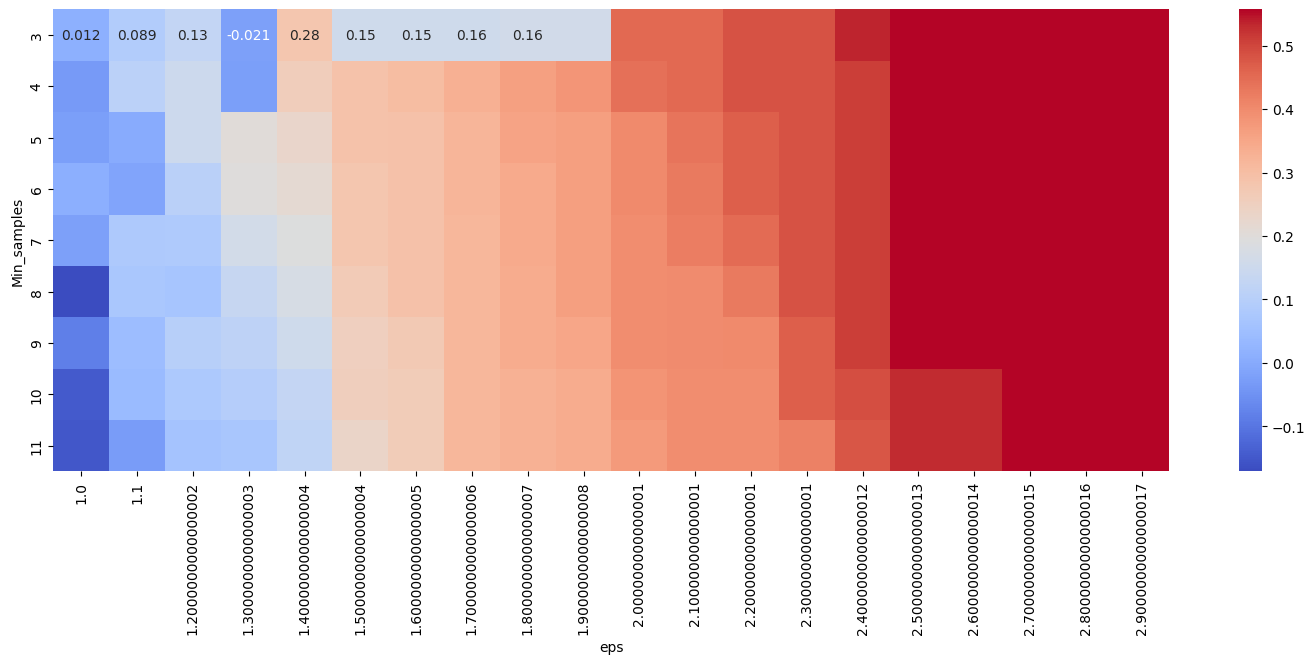

In [50]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True,annot_kws={'size':10},cmap='coolwarm',ax=ax)
plt.show()

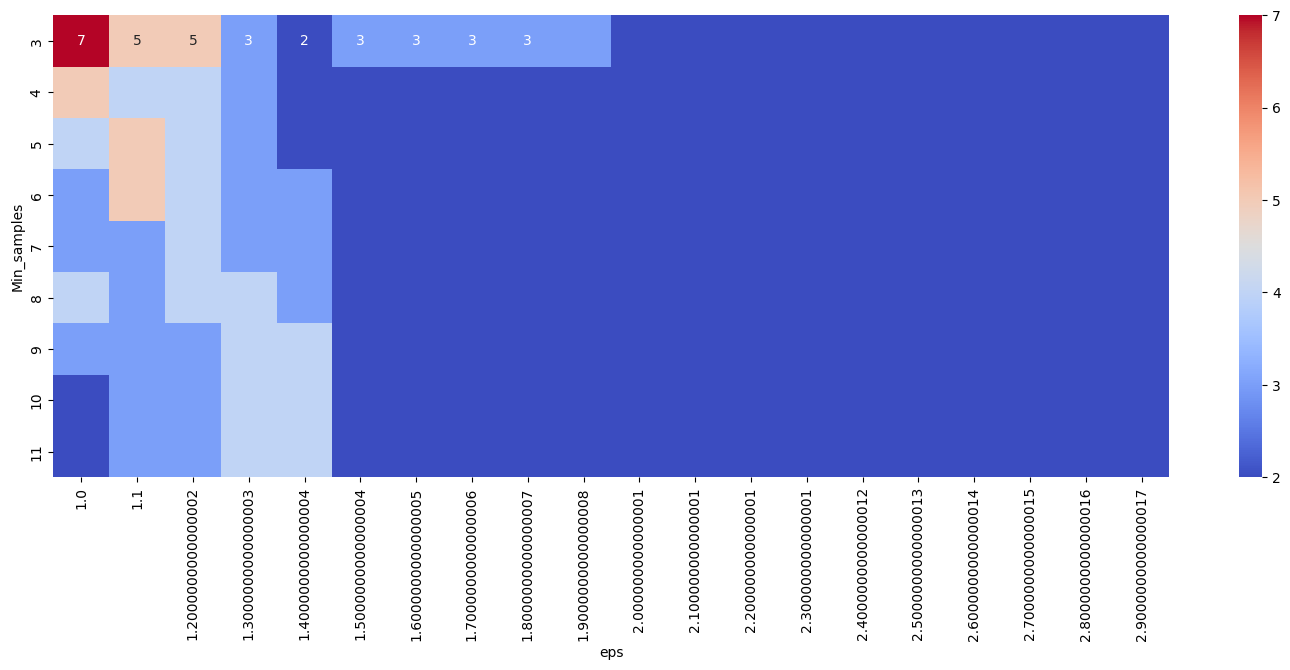

In [51]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True,annot_kws={'size':10},cmap='coolwarm',ax=ax)
plt.show()

In [52]:
dbscan_train = DBSCAN(eps=1.7, min_samples=3)
y_dbscan = dbscan_train.fit_predict(df_country_scaler)
print(silhouette_score(df_country_scaler,y_dbscan))
df_country['dbscan_pca'] = y_dbscan

0.1563549566374231


### Evaluación de resultados

In [53]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans_pca,hc_pca,dbscan_pca
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2,0,0


In [54]:
df_country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'Kmeans_pca', 'hc_pca',
       'dbscan_pca'],
      dtype='object')

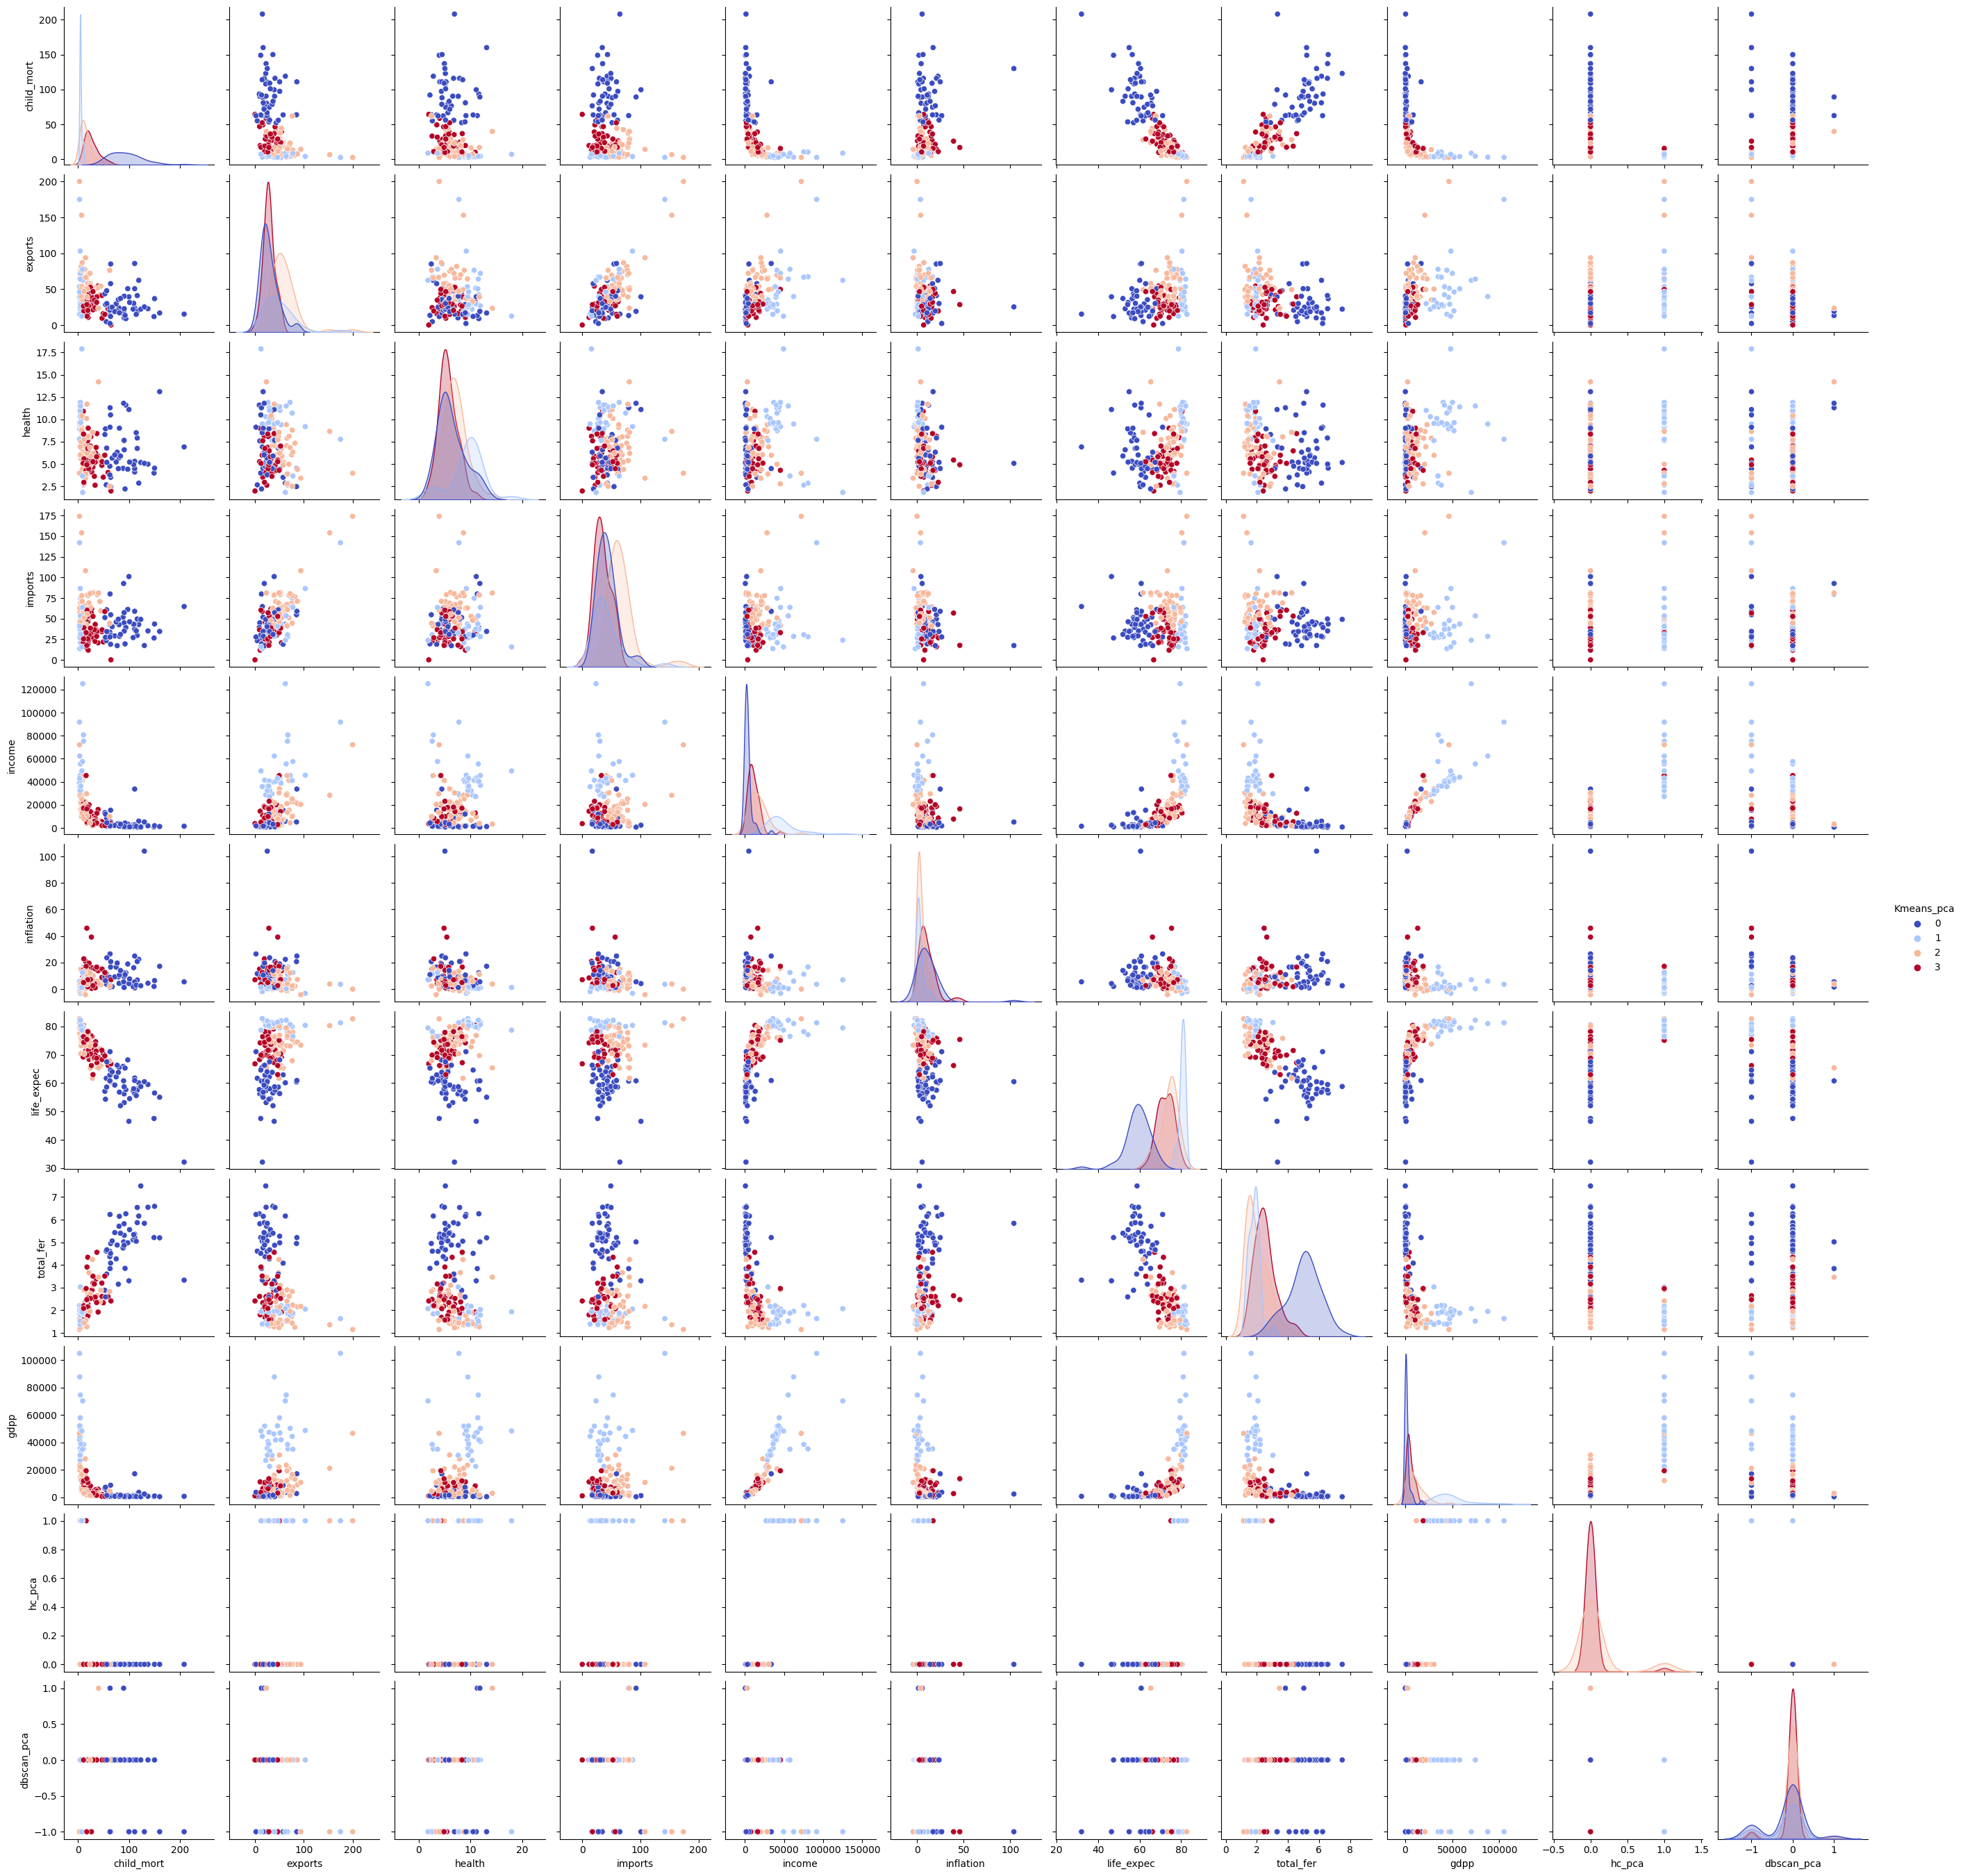

In [57]:
sns.pairplot(data=df_country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'Kmeans_pca', 'hc_pca',
       'dbscan_pca']], hue='Kmeans_pca',palette='coolwarm')

<Axes: xlabel='child_mort', ylabel='gdpp'>

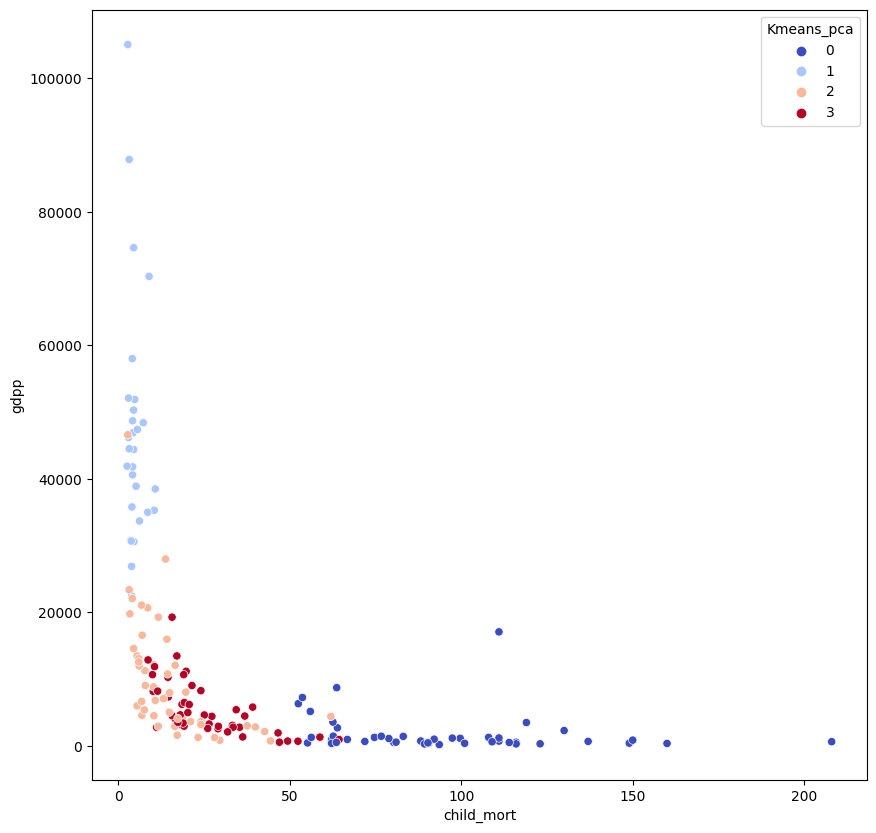

In [63]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=df_country,x='child_mort',y='gdpp',hue='Kmeans_pca',palette='coolwarm')

In [70]:
df_country[df_country['Kmeans_pca']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans_pca,hc_pca,dbscan_pca
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0,0,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0,0,0
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,0,0,0
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,0,0,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,0,0,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0,0,0
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,0,0,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,0,0,0
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,0,0,0
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,0,0,0
